In [1]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
import os
from sklearn.model_selection import train_test_split
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
import itertools

In [1]:
#collapse
# import some packages
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 10, 2020
@author: neeks, cmu
"""
import numpy as np
from os import path
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import librosa
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
sns.set_style("white")
sns.set_style("ticks")

# urls for csvs
url_metadata_annotations = 'https://raw.githubusercontent.com/iiscleap/Coswara-Exp/master/Annotated_v2/Annotated_v2_ans.csv'
url_metadata_recordings = 'https://raw.githubusercontent.com/iiscleap/Coswara-Data/master/combined_data.csv'

path_audio_data = '/Volumes/BackupNeeks/dBase/coswaradBase/annotatedFiles/audio_19Oct2020/'
path_store_figure = './figures/'
fig_save = 0

# load the csvs
df_2 = pd.read_csv(url_metadata_recordings) # recording metadata

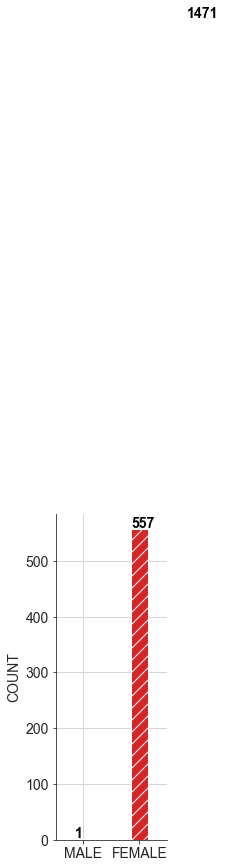

In [2]:
#collapse
DF = df_2.copy()
# plot gender
gender_labels = DF['g'].unique()[::-1]
gender_cnt = []
for i in range(len(gender_labels)):
    gender_cnt.append(len(DF[(DF['g'] == gender_labels[i])]))# & (DF['recording']=='breathing-deep')]))

clr_1 = 'tab:blue'
clr_2 = 'tab:red'
fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,gender_cnt[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.6)
ax.bar(4,gender_cnt[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.6)

for i, v in enumerate(gender_cnt):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
plt.xticks([2,4], ['MALE','FEMALE'],rotation=0)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(1,5)
# ax.set_ylim(200,1500)
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_gender.pdf", bbox_inches='tight')
plt.show()

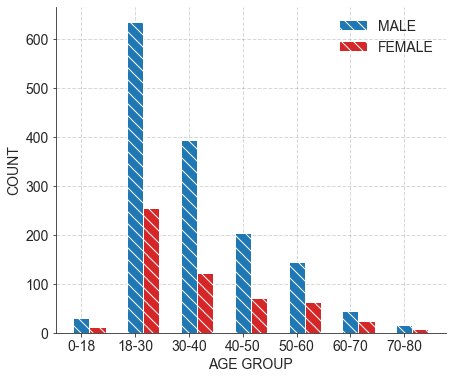

In [3]:
#collapse
# plot age
age_labels = DF['a'].unique()
age_cnt_male = []
age_cnt_female = []
for i in range(len(age_labels)):
    if age_labels[i] == 'X':
        age_labels[i] = 0
    age_cnt_male.append(len(DF[(DF['a'] == age_labels[i])  & (DF['g']=='male')]))
    age_cnt_female.append(len(DF[(DF['a'] == age_labels[i]) & (DF['g']=='female')]))

age_cnt_male = DF[(DF['g']=='male')]['a'].values
age_cnt_female = DF[(DF['g']=='female')]['a'].values

age_labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60-70', '70-80']

age_grouped_male = []
age_grouped_female = []

for i in age_labels:
    age_grouped_male.append(len(age_cnt_male[(age_cnt_male > (int(i.split('-')[0])-1)) & \
                                        (age_cnt_male < int(i.split('-')[1]))]))
    age_grouped_female.append(len(age_cnt_female[(age_cnt_female > (int(i.split('-')[0])-1)) & \
                                        (age_cnt_female < int(i.split('-')[1]))]))
clr_1 = 'tab:blue'
clr_2 = 'tab:red'

fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(np.arange(0,len(age_labels)),age_grouped_male, align='center',alpha=1,hatch="\\\\",ecolor='black',capsize=5,color=clr_1,width=.3,label='MALE')
ax.bar(np.arange(0,len(age_labels))+.3,age_grouped_female, align='center',alpha=1,hatch="\\\\",ecolor='black',capsize=5,color=clr_2,width=.3,label='FEMALE')
ax.legend(frameon=False,loc='upper right',fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('AGE GROUP', fontsize=14)
plt.xticks(np.arange(0,len(age_labels)), age_labels,rotation=0,fontsize=14)
plt.yticks(fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_coswara_metadata_age.pdf", bbox_inches='tight')
plt.show()

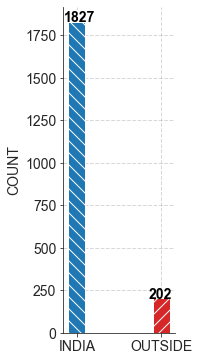

In [4]:
#collapse
# plot country
country_labels = DF['l_c'].unique()
country_cnt = []
for i in range(len(country_labels)):
    country_cnt.append(len(DF[(DF['l_c'] == country_labels[i])]))
country_cnt = np.array(country_cnt)
indx = np.argsort(country_cnt)[::-1]
country_cnt = country_cnt[indx]
country_labels = country_labels[indx]
two_categories = [country_cnt[0],np.sum(country_cnt[1:])]
two_labels = ['INDIA','OUTSIDE']

fig, ax = plt.subplots(figsize=(2, 6))
ax.bar(2,two_categories[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.4)
ax.bar(4,two_categories[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr_2,width=.4)
plt.xticks([2,4],two_labels,rotation=0,fontsize=14)
for i, v in enumerate(two_categories):
    ax.text(2*(i+1)-.3,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()

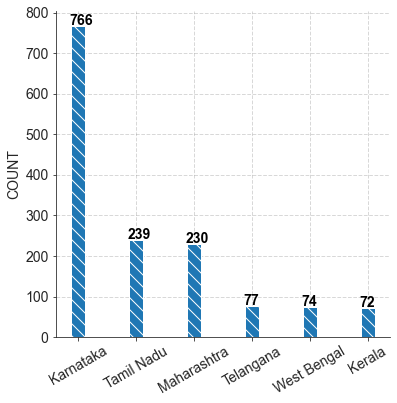

In [5]:
#collapse
# plot state
state_labels = DF['l_s'].unique()
state_cnt = []
for i in range(len(state_labels)):
    state_cnt.append(len(DF[(DF['l_s'] == state_labels[i])]))
state_cnt = np.array(state_cnt)
indx = np.argsort(state_cnt)[::-1][0:6]
state_cnt = state_cnt[indx]
state_labels = state_labels[indx]
    

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(np.arange(0,len(state_cnt)),state_cnt, align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr_1,width=.25)
ax.set_ylabel('COUNT',fontsize=14)
# # ax.text(1.5,-9,'MEAN',horizontalalignment='center')
plt.xticks(np.arange(0,len(state_cnt)),state_labels,rotation=30,fontsize=14)
plt.yticks(fontsize=14)
for i, v in enumerate(state_cnt):
    ax.text(i-.15,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_state.pdf", bbox_inches='tight')
plt.show()

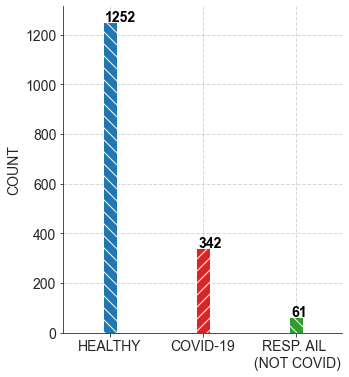

In [6]:
#collapse
##### init path to list
path_to_lists = '/Users/neeks/Desktop/Documents/work/code/python_codes/notebookCodes/coswara/lists/'
#####

DF_more = DF.replace('None', np.nan)
DF_more = DF.replace(np.nan, False)
DF_more['healthy'] = False
DF_more['covid'] = 0.0
DF_more['unhealthy_but_no_covid'] = False

for i in range(len(DF_more)):
    # healthy
    if (DF_more.at[i,'covid_status']=='healthy') & (DF_more.at[i,'asthma']==False) &\
    (DF_more.at[i,'cld']==False) & (DF_more.at[i,'cold']==False) &\
    (DF_more.at[i,'cough']==False) & (DF_more.at[i,'pneumonia']==False) &\
    (DF_more.at[i,'fever']==False):
        DF_more.at[i,'healthy'] = True
        
    # covid
    if (DF_more.at[i,'covid_status']=='positive_asymp'):
        DF_more.at[i,'covid'] = 1
        
    if (DF_more.at[i,'covid_status']=='positive_mild'):
        DF_more.at[i,'covid'] = 2

    if (DF_more.at[i,'covid_status']=='positive_moderate'):
        DF_more.at[i,'covid'] = 3

    # unhealthy but not covid
    if (DF_more.at[i,'covid_status']=='resp_illness_not_identified') & ((DF_more.at[i,'asthma']==True) |\
    (DF_more.at[i,'cld']==True) | (DF_more.at[i,'cold']==True) |\
    (DF_more.at[i,'cough']==True) | (DF_more.at[i,'pneumonia']==True)):
        DF_more.at[i,'unhealthy_but_no_covid'] = True
        
health_categories_cnt_all = []

# get healthy
health_categories_cnt_all.append(len(DF_more[(DF_more['healthy']==True)]))

# get covid
health_categories_cnt_all.append(len(DF_more[(DF_more['covid']>0)]))

# get resp. ail.
health_categories_cnt_all.append(len(DF_more[(DF_more['unhealthy_but_no_covid']==True)]))


clr = ['tab:blue','tab:red','tab:green']

fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(2, health_categories_cnt_all[0], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[0],width=.3)
ax.bar(4, health_categories_cnt_all[1], align='center',alpha=1, ecolor='black',capsize=5,hatch="//",color=clr[1],width=.3)
ax.bar(6, health_categories_cnt_all[2], align='center',alpha=1, ecolor='black',capsize=5,hatch="\\\\",color=clr[2],width=.3)

plt.xticks([2,4,6],['HEALTHY','COVID-19','RESP. AIL \n (NOT COVID)'],rotation=0,fontsize=14)
for i, v in enumerate(health_categories_cnt_all):
    ax.text(2*(i+1)-.1,v + 3, str(v), color='black', fontweight='bold',fontsize=14)
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
plt.ylabel('COUNT', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(1,7)
# if fig_save:
#     ax.figure.savefig(path_store_figure+"IS2020_metadata_country.pdf", bbox_inches='tight')
plt.show()

In [2]:
df = pd.read_csv(r"C:\Kgp\CP\Preparation\COVID Project\Files\Smote_data.csv")
test_audio = pd.read_csv(r"C:\Kgp\CP\Preparation\COVID Project\Files\scaled_data.csv")

In [3]:
# 1 - Healthy
# 0 - COVID +ve

In [4]:
# With MinMaxScaler implemented
df

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0       0.975000 -0.225520          -1.133697           -1.419965 -1.341559   
1       1.138436 -1.085691           0.458562            0.432626  0.072958   
2       0.729820 -0.463494           1.126956            0.996399  1.257855   
3       0.079311 -0.968320          -0.561011            0.281959 -0.012494   
4      -0.070381 -0.531515          -0.842920           -0.657277 -0.780357   
..           ...       ...                ...                 ...       ...   
289    -0.556269 -0.350057          -1.080962           -0.875157 -1.032021   
290     0.024259 -0.731510          -0.420708            0.188127 -0.009847   
291    -0.900309 -0.356178          -0.216558           -0.705085 -0.524322   
292     1.417955 -0.767077          -0.253198            0.147182  0.034794   
293    -0.162029 -0.571678          -0.448160           -0.421199 -0.415027   

     zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
0             -0.632042 -0.583560  0.898607 -0.365554 -0.259207  ...   
1             -0.057713 -1.792492 -0.521783  0.305802  2.225591  ...   
2              1.002515  0.220042 -0.866718  0.239354  0.073121  ...   
3             -0.915131 -0.379598  0.760281  0.619239  0.313684  ...   
4             -0.593184 -1.093765 -0.620821  0.698026 -0.100955  ...   
..                  ...       ...       ...       ...       ...  ...   
289           -0.328240 -0.925234 -0.299061  0.325225 -0.821130  ...   
290           -0.582697 -0.358569  0.399158  0.494151  0.324927  ...   
291            0.519523 -0.998423 -0.348936  0.540795  0.163999  ...   
292           -0.252193 -0.319421  0.501476  0.246987 -0.004164  ...   
293           -0.178561 -1.128523 -1.060540  0.565385  0.460945  ...   

       mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0   -0.657483  0.391056  0.263061  0.141073  0.050127  0.140086 -0.207874   
1    0.293051  1.700987  0.023959  1.571899  1.136404  1.256854  0.926503   
2   -0.457561 -0.106347  0.455469  0.717856  0.509769 -0.937644 -0.218431   
3   -0.576460 -1.546116 -0.915997 -0.759205  0.669422 -1.606791 -0.906112   
4   -0.548312 -0.015434 -0.661079  0.861282 -0.577522 -0.526032 -0.558068   
..        ...       ...       ...       ...       ...       ...       ...   
289 -0.266535  0.301427 -0.362390 -0.097849 -0.179502  0.288461 -0.213550   
290 -0.779739 -1.231706 -1.072044 -0.662077  0.188102 -1.332514 -1.207745   
291 -1.479120 -0.097339 -1.047512  0.485544 -1.308414 -0.193282  0.317884   
292 -0.675050 -1.138059 -0.116032 -0.517911  0.654548 -1.097765  0.557971   
293 -0.332058  0.734611 -0.635033  0.561414 -1.075740 -0.152706 -0.611029   

       mfcc19    mfcc20  label  
0    0.149673 -0.535819      1  
1    1.117961  0.811248      1  
2    0.345348 -0.942711      1  
3   -2.644708 -1.166570      0  
4   -0.524245 -0.962037      0  
..        ...       ...    ...  
289 -0.228322 -0.390851      0  
290 -2.580361 -1.114750      0  
291  0.404357 -0.480459      0  
292 -1.632789 -0.465278      0  
293 -0.580293 -0.508723      0  

[294 rows x 27 columns]

In [5]:
df.describe()

chroma_stft        rmse  spectral_centroid  spectral_bandwidth  \
count   294.000000  294.000000         294.000000          294.000000   
mean     -0.091671   -0.137471          -0.221785           -0.271619   
std       0.817727    0.802605           0.827139            0.838459   
min      -2.860431   -1.115674          -2.173364           -2.318633   
25%      -0.563475   -0.617144          -0.764561           -0.702462   
50%      -0.201156   -0.379723          -0.365568           -0.498790   
75%       0.317373    0.122057           0.153469            0.291567   
max       2.915939    3.599065           3.415960            1.932532   

          rolloff  zero_crossing_rate       mfcc1       mfcc2       mfcc3  \
count  294.000000          294.000000  294.000000  294.000000  294.000000   
mean    -0.243843            0.012073   -0.313114   -0.142479    0.054825   
std      0.827948            0.884168    0.879931    0.851290    0.854345   
min     -2.368416           -1.835891   -3.055375   -2.140384   -2.646817   
25%     -0.677514           -0.510581   -1.106112   -0.709955   -0.347568   
50%     -0.425912           -0.238200   -0.360407   -0.289581    0.239550   
75%      0.129068            0.318659    0.147103    0.397723    0.611764   
max      2.443989            3.939751    2.320181    2.709799    2.094418   

            mfcc4  ...      mfcc12      mfcc13      mfcc14      mfcc15  \
count  294.000000  ...  294.000000  294.000000  294.000000  294.000000   
mean     0.088562  ...   -0.410303    0.196090   -0.415078    0.076569   
std      0.859673  ...    0.929379    0.914431    0.946607    0.816432   
min     -2.078192  ...   -2.382422   -2.796005   -3.659537   -4.222501   
25%     -0.420969  ...   -1.036077   -0.285048   -1.005425   -0.357655   
50%      0.117112  ...   -0.572359    0.258730   -0.575084    0.084209   
75%      0.448871  ...    0.180304    0.831587    0.155286    0.572752   
max      5.876256  ...    3.222945    2.264037    2.607832    2.078110   

           mfcc16      mfcc17      mfcc18      mfcc19      mfcc20       label  
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000  
mean    -0.358232   -0.243778   -0.226856   -0.192521   -0.309347    0.500000  
std      0.952335    0.870892    0.858584    0.939615    0.885369    0.500853  
min     -2.568262   -2.596144   -2.867456   -2.644708   -2.098204    0.000000  
25%     -1.147499   -0.781248   -0.632229   -0.641098   -0.847022    0.000000  
50%     -0.427743   -0.273501   -0.312473   -0.216644   -0.421017    0.500000  
75%      0.295348    0.219403    0.236766    0.295938    0.083204    1.000000  
max      2.948232    4.092395    3.202071    3.915912    5.575142    1.000000  

[8 rows x 27 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         294 non-null    float64
 1   rmse                294 non-null    float64
 2   spectral_centroid   294 non-null    float64
 3   spectral_bandwidth  294 non-null    float64
 4   rolloff             294 non-null    float64
 5   zero_crossing_rate  294 non-null    float64
 6   mfcc1               294 non-null    float64
 7   mfcc2               294 non-null    float64
 8   mfcc3               294 non-null    float64
 9   mfcc4               294 non-null    float64
 10  mfcc5               294 non-null    float64
 11  mfcc6               294 non-null    float64
 12  mfcc7               294 non-null    float64
 13  mfcc8               294 non-null    float64
 14  mfcc9               294 non-null    float64
 15  mfcc10              294 non-null    float64
 16  mfcc11  

In [7]:
X = df.iloc[: ,:-1]
Y = df.iloc[: ,-1]

In [8]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
# https://github.com/Trusted-AI/AIX360 - Ongoing
# https://github.com/BCG-Gamma/facet - Issues
# https://github.com/oegedijk/explainerdashboard - Working
# https://github.com/explainX/explainx - Installation Issue
# LIME and SHAP Implementations
# https://github.com/EthicalML/xai - Not much useful

In [10]:
# from sklearn.ensemble import RandomForestClassifier
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# from explainerdashboard.datasets import titanic_survive, titanic_names

# feature_descriptions = {
#     "Sex": "Gender of passenger",
#     "Gender": "Gender of passenger",
#     "Deck": "The deck the passenger had their cabin on",
#     "PassengerClass": "The class of the ticket: 1st, 2nd or 3rd class",
#     "Fare": "The amount of money people paid", 
#     "Embarked": "the port where the passenger boarded the Titanic. Either Southampton, Cherbourg or Queenstown",
#     "Age": "Age of the passenger",
#     "No_of_siblings_plus_spouses_on_board": "The sum of the number of siblings plus the number of spouses on board",
#     "No_of_parents_plus_children_on_board" : "The sum of the number of parents plus the number of children on board",
# }

# X_train, y_train, X_test, y_test = titanic_survive()
# train_names, test_names = titanic_names()
# model = RandomForestClassifier(n_estimators=50, max_depth=5)
# model.fit(X_train, y_train)

# explainer = ClassifierExplainer(model, X_test, y_test, 
#                                 cats=['Deck', 'Embarked',
#                                     {'Gender': ['Sex_male', 'Sex_female', 'Sex_nan']}],
#                                 cats_notencoded={'Embarked': 'Stowaway'}, # defaults to 'NOT_ENCODED'
#                                 descriptions=feature_descriptions, # adds a table and hover labels to dashboard
#                                 labels=['Not survived', 'Survived'], # defaults to ['0', '1', etc]
#                                 idxs = test_names, # defaults to X.index
#                                 index_name = "Passenger", # defaults to X.index.name
#                                 target = "Survival", # defaults to y.name
#                                 )

# db = ExplainerDashboard(explainer, 
#                         title="Titanic Explainer", # defaults to "Model Explainer"
#                         shap_interaction=False, # you can switch off tabs with bools
#                         )
# db.run(port=8050)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1234)

In [12]:
rfc.score(X_test,y_test)

0.9897959183673469

In [13]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

# Test Result - 1

In [17]:
rfc.predict(test_audio)

array([1], dtype=int64)

classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        49

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



<AxesSubplot:>

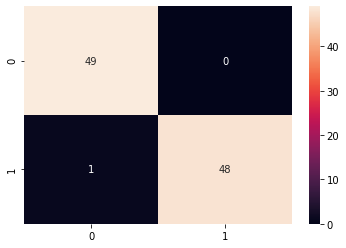

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_test,y_pred)
print("classification report:", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [19]:
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# explainer = ClassifierExplainer(rfc, X_test, y_test)
#ExplainerDashboard(explainer).run()

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
[15:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


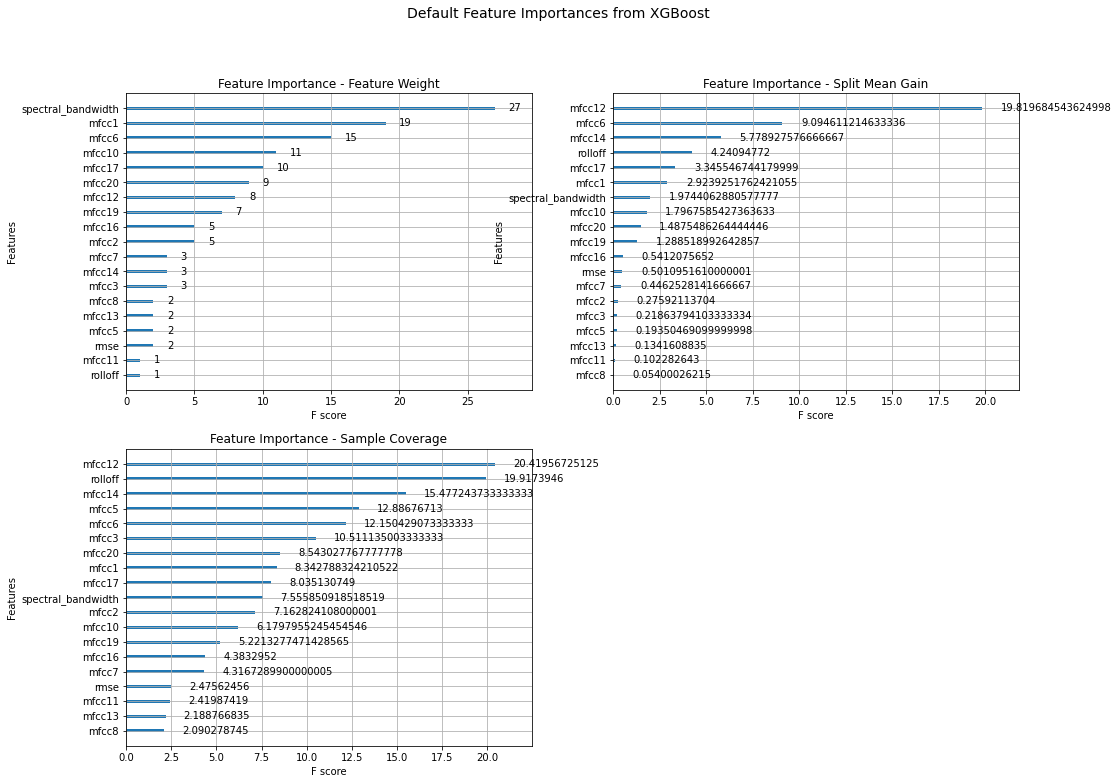

In [20]:
# # https://github.com/DemystifAI/explainableAI/blob/master/Income_XAI.ipynb
# XGBOOST Feature Importance
import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

In [21]:
# Since XGBoost has some issues with feature name ordering when building models with dataframes,
# we will build our same model with numpy arrays to make LIME work. Remember the model being built
# is the same ensemble model which we treat as our black box machine learning model
import xgboost as xgb
xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)

[15:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
headers = X_train.columns

In [23]:
# ------------------------------------------------ #

# LIME Implementation

# ------------------------------------------------ #

*LimeTabularExplainer* class helps in explaining predictions on tabular (i.e. matrix) data. For numerical features, it perturbs them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and stds in the training data. For categorical features, it perturbs by sampling according to the training distribution, and making a binary feature that is 1 when the value is the same as the instance being explained.

*explain_instance()* function generates explanations for a prediction. First, we generate neighborhood data by randomly perturbing features from the instance. We then learn locally weighted linear (surrogate) models on this neighborhood data to explain each of the classes in an interpretable way.

In [24]:
explainer = LimeTabularExplainer(X_train.values, feature_names= headers, discretize_continuous=True, 
                                 class_names=['COVID +ve', 'Healthy'],verbose=True)

Healthy Sample

In [25]:
# Explain instance i=0
exp1 = explainer.explain_instance(X_test.iloc[0].values, xgc_np.predict_proba, distance_metric='euclidean')

Intercept 0.5294102904765922
Prediction_local [1.10625285]
Right: 0.99351573


In [26]:
y_test.iloc[0]

1

In [27]:
exp1.show_in_notebook(show_table=True)

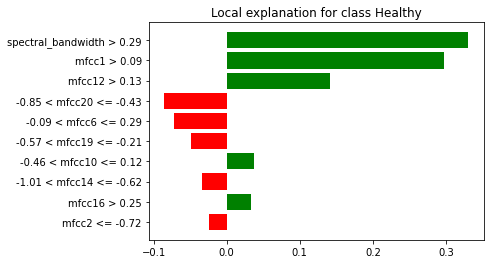

In [28]:
fig1 = exp1.as_pyplot_figure()

In [29]:
exp1.as_list()

[('spectral_bandwidth > 0.29', 0.3307745546000641),
 ('mfcc1 > 0.09', 0.29766963245202904),
 ('mfcc12 > 0.13', 0.1420582102745139),
 ('-0.85 < mfcc20 <= -0.43', -0.08564180497684765),
 ('-0.09 < mfcc6 <= 0.29', -0.07239237643057113),
 ('-0.57 < mfcc19 <= -0.21', -0.04864482891110828),
 ('-0.46 < mfcc10 <= 0.12', 0.03719376175280427),
 ('-1.01 < mfcc14 <= -0.62', -0.034367091992241756),
 ('mfcc16 > 0.25', 0.033917499602961504),
 ('mfcc2 <= -0.72', -0.023724997794617696)]

COVID +ve Sample

In [30]:
# Explain instance i=1
exp2 = explainer.explain_instance(X_test.iloc[1].values, xgc_np.predict_proba, distance_metric='euclidean')

Intercept 0.8464898727237479
Prediction_local [0.18800481]
Right: 0.007596291


In [37]:
y_test.iloc[1]

0

In [38]:
exp2.show_in_notebook(show_table=True)

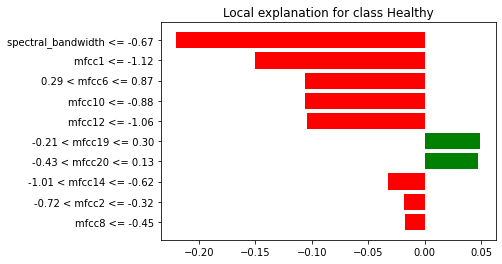

In [41]:
fig2 = exp2.as_pyplot_figure()

In [42]:
exp2.as_list()

[('spectral_bandwidth <= -0.67', -0.2202881881768397),
 ('mfcc1 <= -1.12', -0.1502642753305307),
 ('0.29 < mfcc6 <= 0.87', -0.10586585492428062),
 ('mfcc10 <= -0.88', -0.1056443838820406),
 ('mfcc12 <= -1.06', -0.10407758977527881),
 ('-0.21 < mfcc19 <= 0.30', 0.04933389427498492),
 ('-0.43 < mfcc20 <= 0.13', 0.04690037745099421),
 ('-1.01 < mfcc14 <= -0.62', -0.032786681370772494),
 ('-0.72 < mfcc2 <= -0.32', -0.01872930751697933),
 ('mfcc8 <= -0.45', -0.017063055484599764)]

# LIME on Test Data

In [43]:
exp3 = explainer.explain_instance(test_audio.iloc[0].values, xgc_np.predict_proba, distance_metric='euclidean')

Intercept 0.3842483468074788
Prediction_local [1.57351326]
Right: 0.9991941


In [44]:
exp3.show_in_notebook(show_table=True)

In [45]:
exp3.as_list()

[('spectral_bandwidth > 0.29', 0.32739947949744935),
 ('mfcc1 > 0.09', 0.29476347287848),
 ('mfcc12 > 0.13', 0.15271550034028522),
 ('mfcc17 > 0.14', 0.12875369985933205),
 ('mfcc20 > 0.13', 0.11920476570691312),
 ('0.29 < mfcc6 <= 0.87', -0.10058210181150112),
 ('mfcc10 > 0.12', 0.09731946116992277),
 ('mfcc14 > 0.23', 0.05954604267540257),
 ('mfcc19 > 0.30', 0.05954174333233922),
 ('mfcc2 > 0.36', 0.05060285322410692)]

### SHAP Implementation


SHAP is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

In [46]:
explainerS = shap.TreeExplainer(xgc)

shap_values = explainerS.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [47]:
print('Expected Value:', explainerS.expected_value)

Expected Value: 0.20095088


In [48]:
pd.DataFrame(shap_values).head()

0         1    2         3         4    5         6         7         8   \
0  0.0 -0.019113  0.0  2.204790  0.103574  0.0  2.060822 -0.099726  0.081864   
1  0.0 -0.055463  0.0 -1.526209 -0.014611  0.0 -0.937162 -0.169772  0.331421   
2  0.0  0.086182  0.0  1.914659  0.083485  0.0 -0.548438 -0.094641 -0.040336   
3  0.0 -0.055463  0.0 -1.546292 -0.008088  0.0 -1.003101 -0.161629  0.122702   
4  0.0 -0.055463  0.0 -1.567444 -0.021804  0.0 -0.946620 -0.169772 -0.063806   

    9   ...        16        17        18        19   20        21        22  \
0  0.0  ...  0.012753  1.040180  0.097878 -0.190412  0.0  0.146278  0.133822   
1  0.0  ... -0.063229 -0.925117  0.038942 -0.380137  0.0 -0.163099 -0.030050   
2  0.0  ...  0.044657  1.207246 -0.036981  0.614668  0.0  0.116596  0.755417   
3  0.0  ... -0.018057  1.649995 -0.092936 -0.380137  0.0 -0.130825  0.146956   
4  0.0  ... -0.063229 -0.972925  0.097878 -0.380137  0.0 -0.163099 -0.050639   

    23        24        25  
0  0.0 -0.146524 -0.460030  
1  0.0  0.350615  0.026356  
2  0.0  0.356702  0.852138  
3  0.0 -0.219216 -0.455434  
4  0.0  0.082098 -0.413129  

[5 rows x 26 columns]

In [49]:
shap.initjs()

# SHAP on test data

In [50]:
shap.force_plot(explainerS.expected_value, shap_values[12,:], test_audio.iloc[0])

In [91]:
# COVID +ve
shap.force_plot(explainerS.expected_value, shap_values[2,:], X_test.iloc[1,:])

In [51]:
# Healthy
shap.force_plot(explainerS.expected_value, shap_values[12,:], X_test.iloc[0,:])

In [52]:
shap.force_plot(explainerS.expected_value, shap_values[:30,:], X_test.iloc[:30,:])

In [53]:
# from aix360.algorithms.shap import KernelExplainer, TreeExplainer
# ip_shap = KernelExplainer(best_estimator(ip_trained).predict_proba, shap.kmeans(test_X, 300)) #kmeans clusters 32980 points into 100 for prototypes
# print(type(ip_shap))

# ip_shap_values  = ip_shap.explain_instance(test_X.iloc[0,:])

In [54]:
#shap.waterfall_plot(ip_shap.explainer.expected_value[0], ip_shap_values[0], test_X.iloc[0, :])

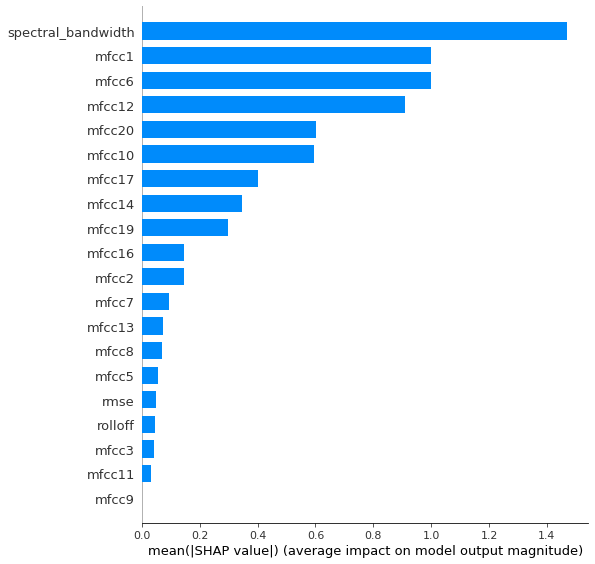

In [55]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

**SHAP Summary Plot**

Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don't fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

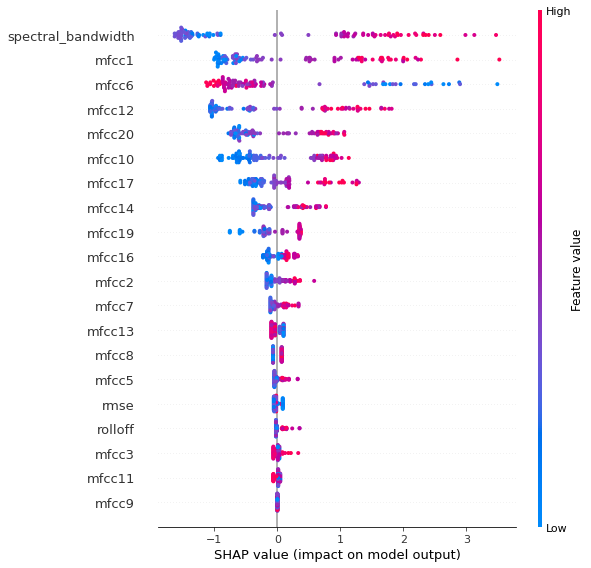

In [56]:
shap.summary_plot(shap_values, X_test)

In [57]:
shap_values.size

2548

**SHAP Dependence Plots:**

**Also see Double dependence plots**

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

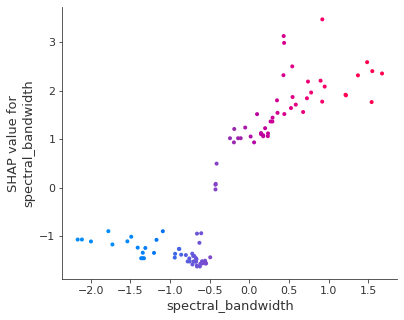

In [58]:
shap.dependence_plot(ind='spectral_bandwidth', interaction_index='spectral_bandwidth',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_train)

In [59]:
# Visualizing the tree 
# https://github.com/DemystifAI/explainableAI/blob/master/fifa_player.ipynb

In [60]:
# Explore https://explainerdashboard.readthedocs.io/en/latest/

In [61]:
# eli5 Library 
features = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']

In [62]:
import eli5
# create our dataframe of feature importances
feat_imp_df = eli5.explain_weights_df(rfc, feature_names=features)
feat_imp_df

feature    weight       std
0               mfcc12  0.135392  0.188040
1                mfcc6  0.103439  0.124526
2   spectral_bandwidth  0.086175  0.143509
3               mfcc20  0.073523  0.131744
4                mfcc1  0.072985  0.116717
5              rolloff  0.068516  0.130289
6               mfcc14  0.065151  0.122212
7               mfcc17  0.049282  0.091652
8               mfcc16  0.044601  0.109959
9               mfcc10  0.040724  0.080075
10              mfcc18  0.038114  0.093276
11   spectral_centroid  0.024926  0.062983
12               mfcc2  0.024880  0.045746
13              mfcc19  0.022813  0.051333
14  zero_crossing_rate  0.019584  0.051459
15               mfcc5  0.017520  0.041624
16              mfcc15  0.017295  0.040311
17               mfcc8  0.015641  0.036754
18         chroma_stft  0.013885  0.044190
19               mfcc7  0.013205  0.050004
20               mfcc4  0.012946  0.035105
21                rmse  0.011900  0.030739
22              mfcc13  0.009311  0.030731
23               mfcc9  0.009096  0.027880
24               mfcc3  0.006998  0.021221
25              mfcc11  0.002097  0.006735

In [63]:
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     rfc],
                               columns=features)

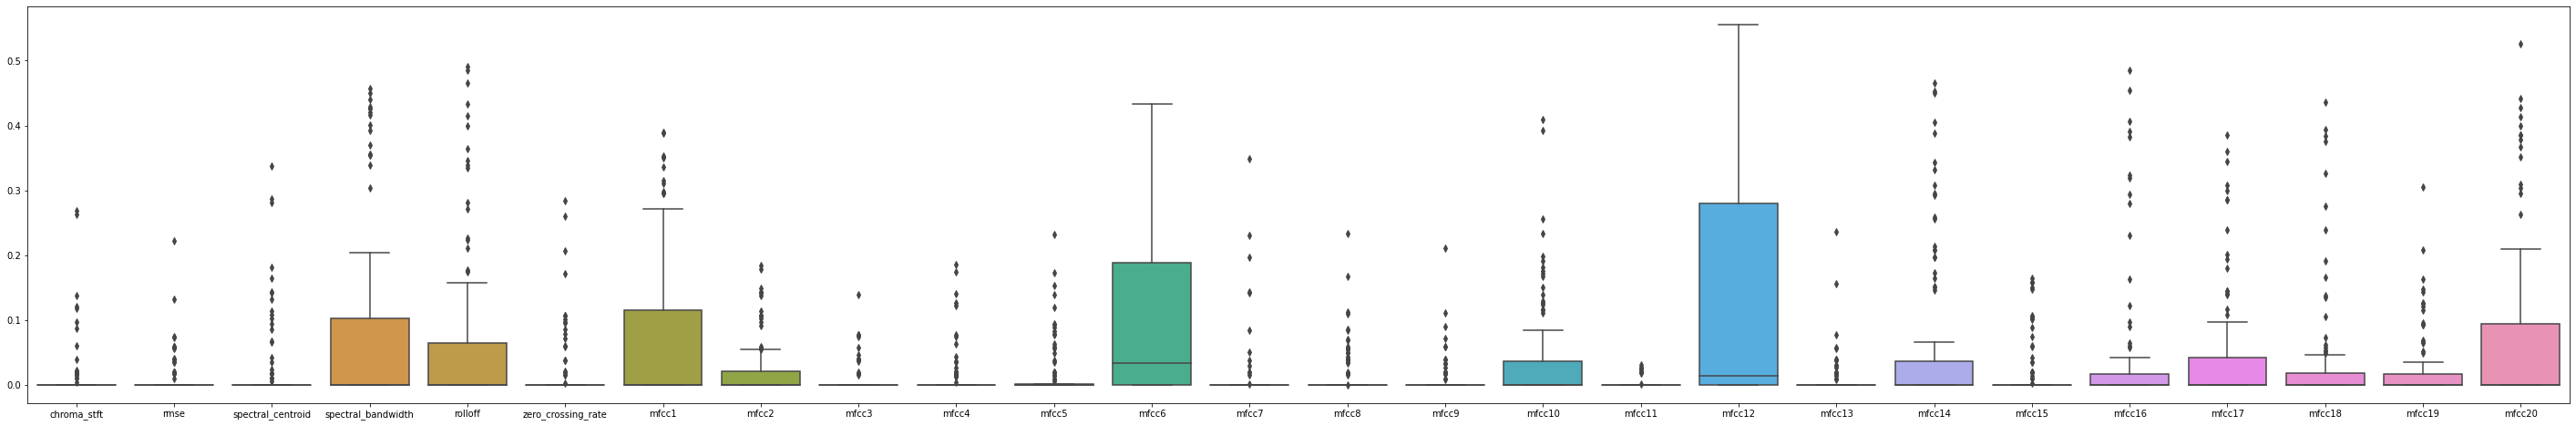

In [64]:
plt.figure(figsize=(50, 8))
sns.boxplot(data = all_feat_imp_df)
plt.savefig('eli5_feature_importance.png')

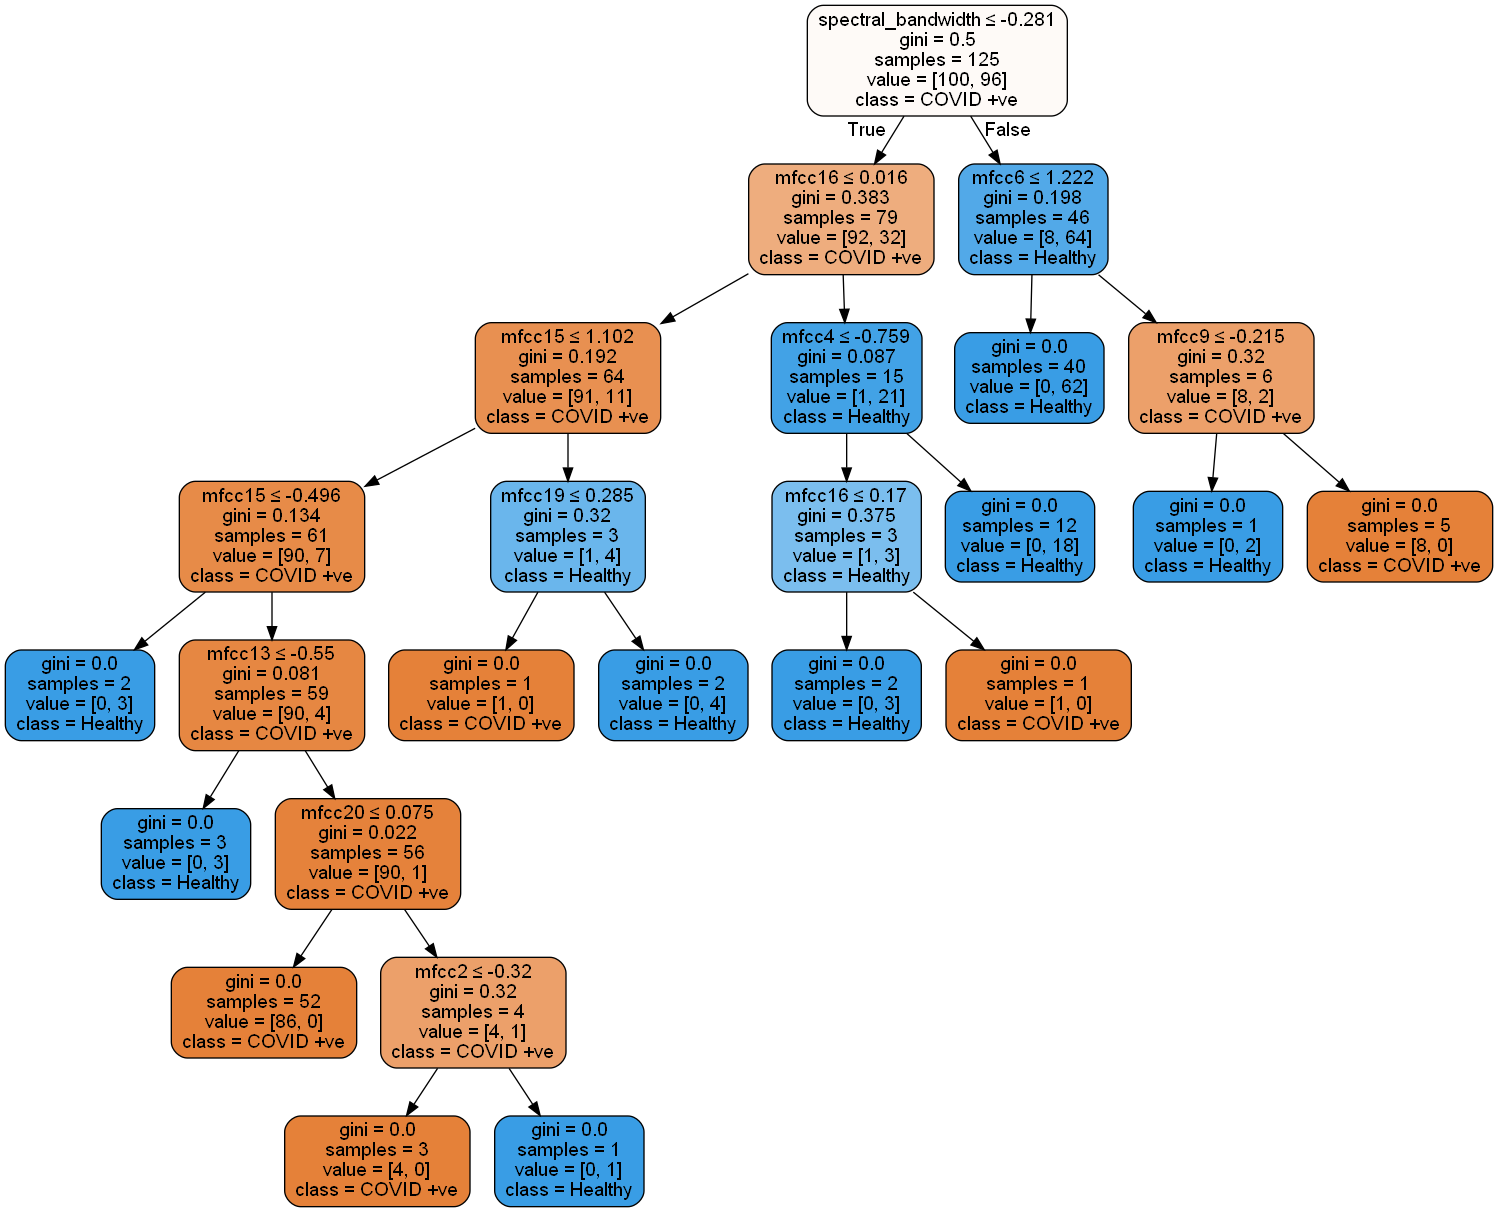

In [65]:
# Model: rfc
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from io import StringIO  

# Get all trees of depth 7 in the random forest
depths7 = [tree for tree in rfc.estimators_ if tree.tree_.max_depth==7]
# grab the first one
tree = depths7[0]
# plot the tree
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True, special_characters=True, class_names=['COVID +ve', 'Healthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('rfc_tree.png') 
Image(graph.create_png())

In [66]:
# Model: xgb
from sklearn.ensemble import GradientBoostingClassifier
gbr_1 = GradientBoostingClassifier(random_state = 2589)
gbr_1.fit(X_train,y_train)

from sklearn_gbmi import *
d=h_all_pairs(gbr_1,X_train)# d is a dictionary of feature pairs and their respective interaction strength
l=sorted(d.items(), key=lambda x: x[1])#converted to a list sorted by interaction values

l=l[-20:] # let's just take the top 10
data=pd.DataFrame(l)
data.columns=['Feature',"Interaction"]
data.index=data['Feature']
data=data.drop(labels=['Feature'],axis=1)

<AxesSubplot:title={'center':'Feature Interaction Strength'}, ylabel='Feature'>

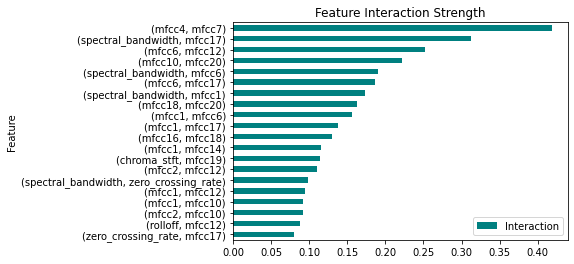

In [67]:
data.plot(kind='barh', color='teal', title="Feature Interaction Strength")

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  1]
 [ 3 46]]


0.9591836734693877

In [69]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [70]:
class_names2pass = sorted(y_test.unique())
print(class_names2pass)
#class_names=['COVID +ve', 'Healthy']

[0, 1]


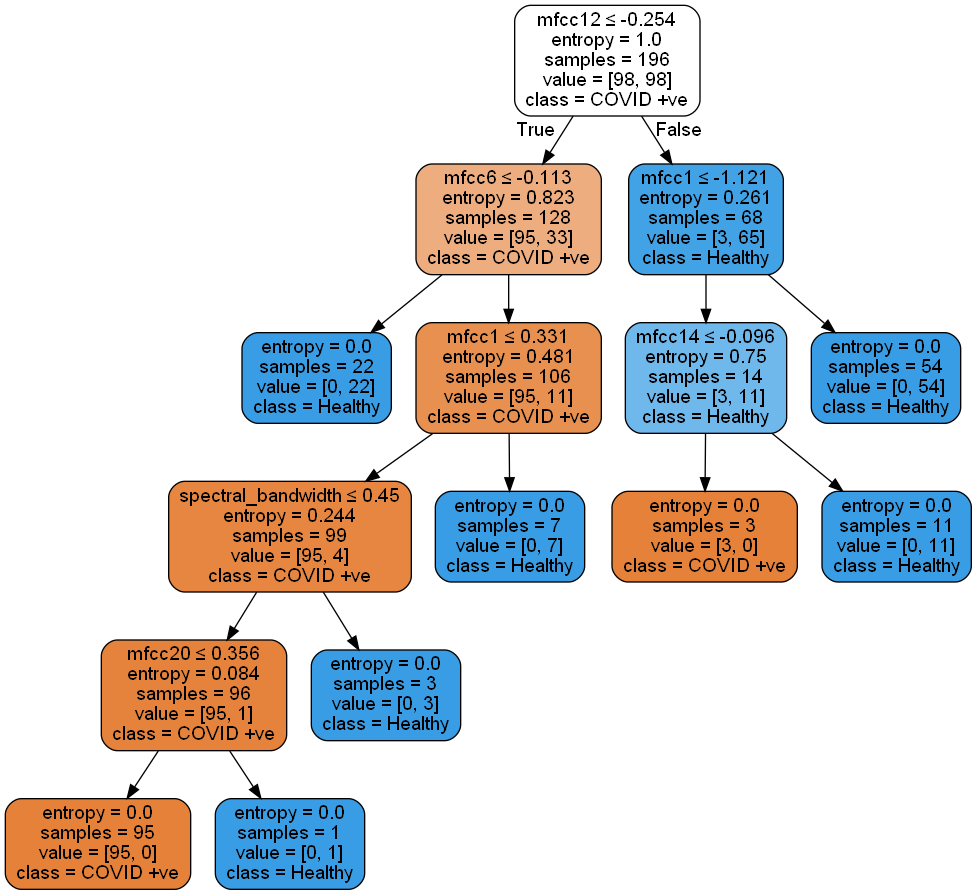

In [71]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['COVID +ve', 'Healthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree_tree.png')
Image(graph.create_png())